In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns

import dataframe_image as dfi

%matplotlib inline

In [2]:
mammals = pd.read_csv("mammals.csv")

In [3]:
df_mam = mammals.copy()

In [4]:
df_mam.set_index("species", inplace=True)

In [5]:
df_mam.head()

,body_wt,brain_wt,non_dreaming,dreaming,total_sleep,life_span,gestation,predation,exposure,danger
species,,,,,,,,,,
Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3
Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4


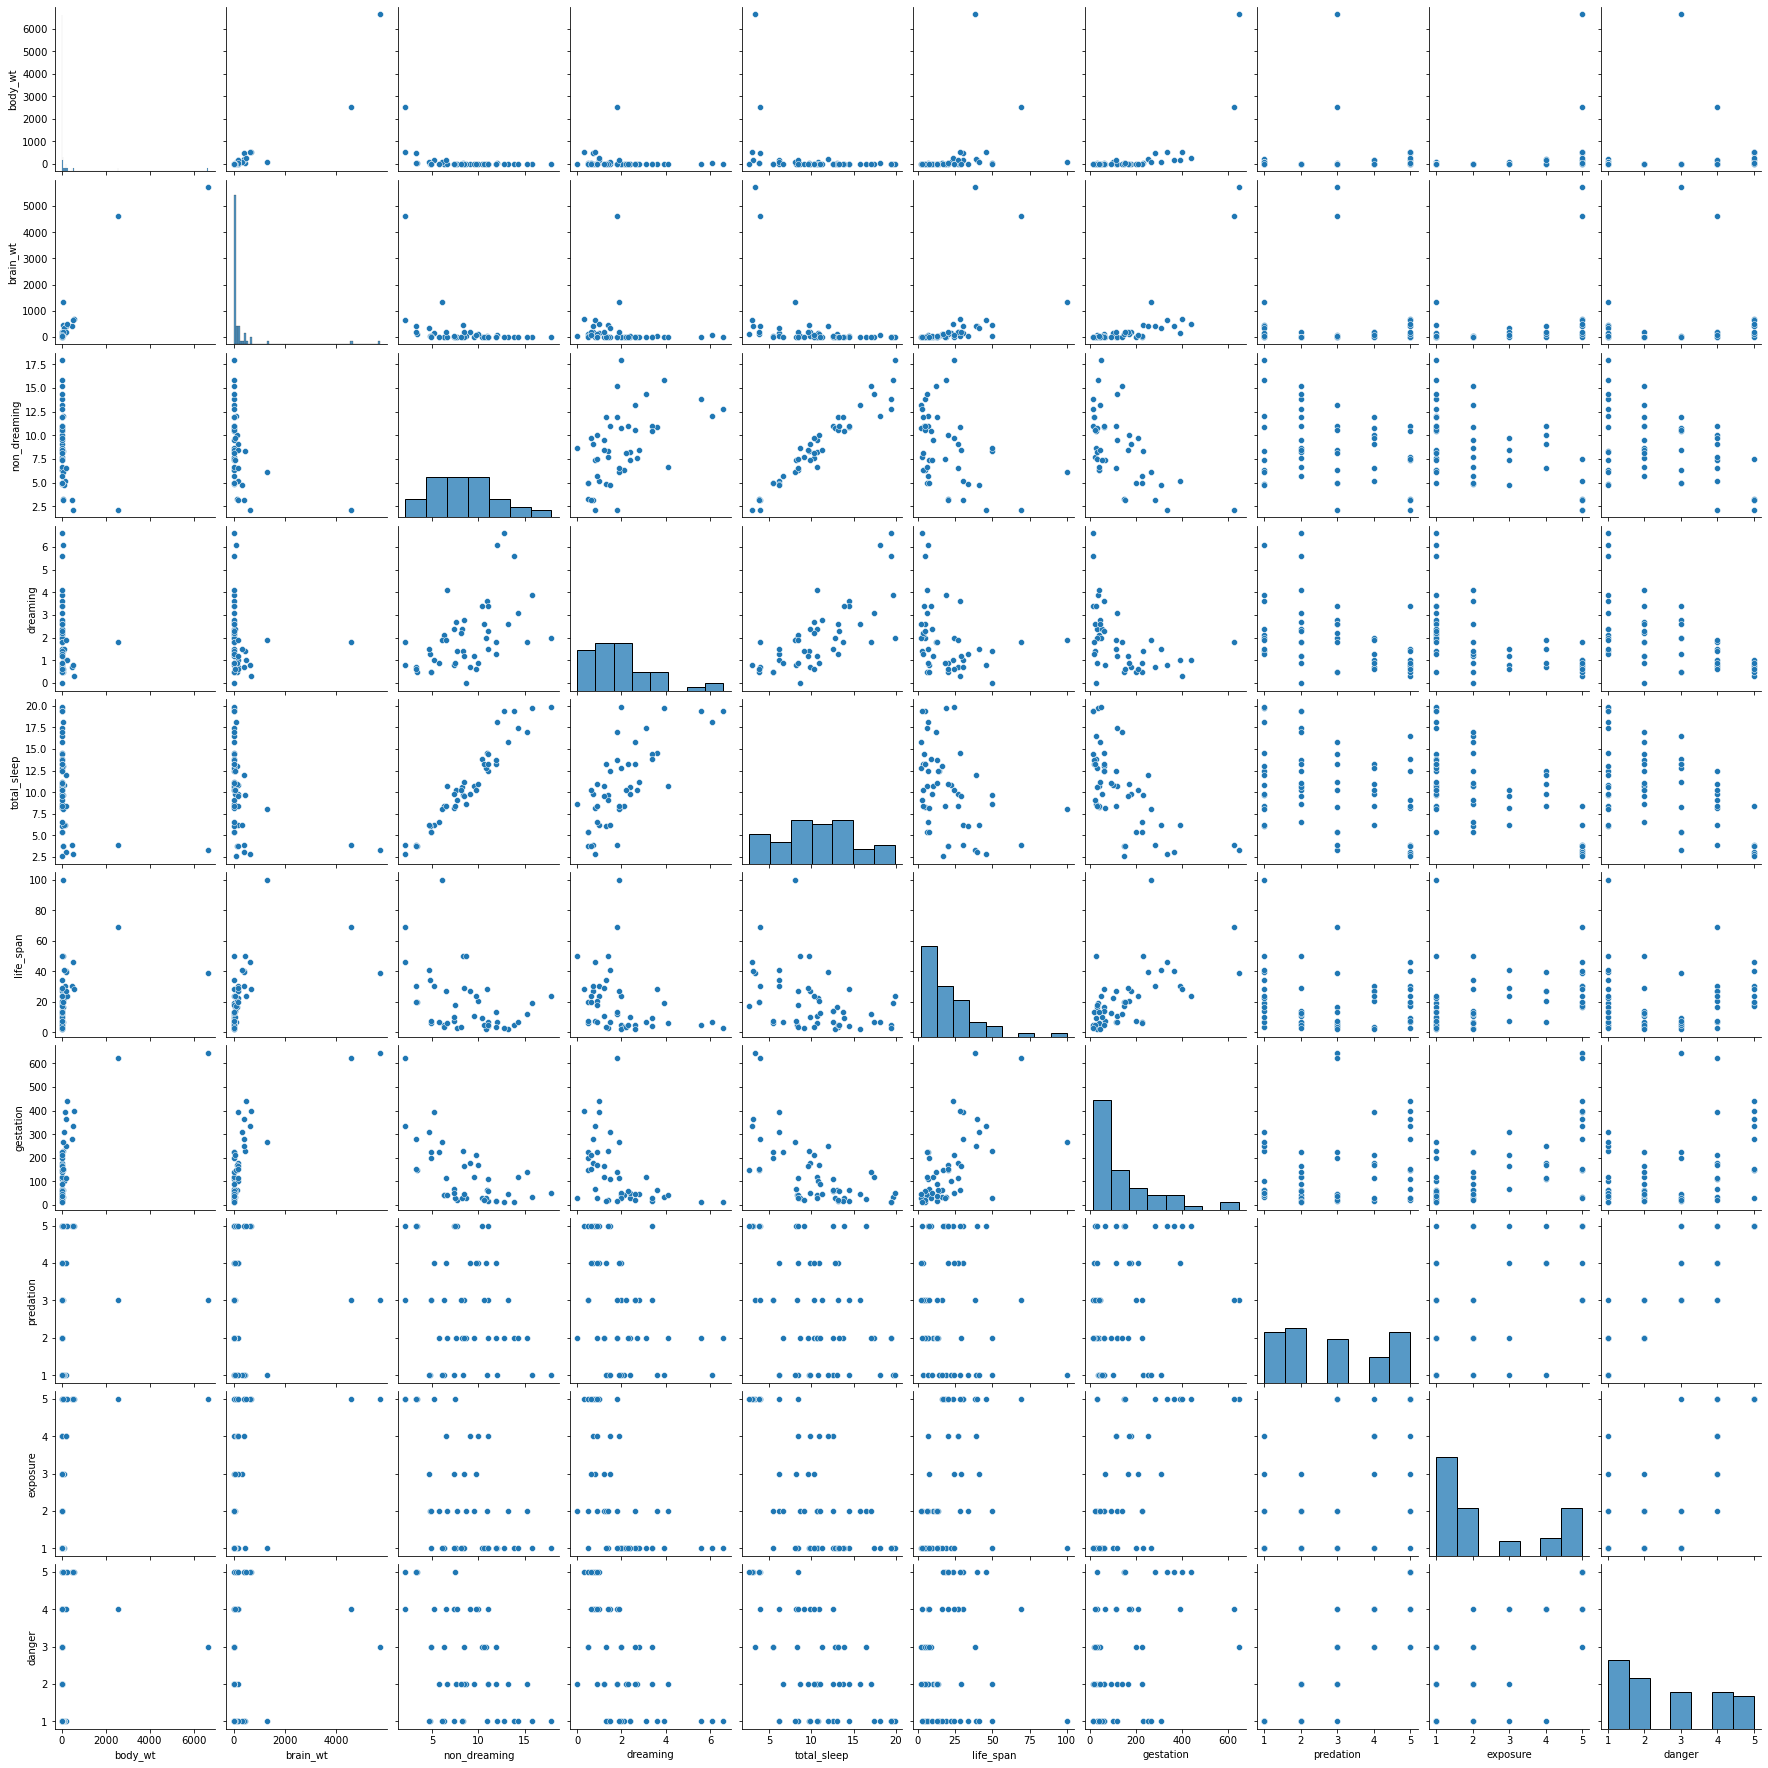

In [6]:
g = sns.pairplot(data=df_mam)

In [7]:
df_mam.isnull().sum()

body_wt          0
brain_wt         0
non_dreaming    14
dreaming        12
total_sleep      4
life_span        4
gestation        4
predation        0
exposure         0
danger           0
dtype: int64

In [8]:
df_mam.dropna(subset=["non_dreaming", "total_sleep"], inplace=True)

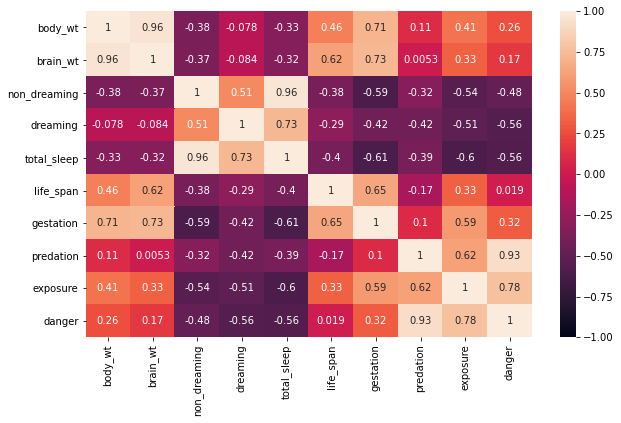

In [9]:
fig = plt.figure(figsize=(10,6))

g = sns.heatmap(df_mam.corr(), vmin=-1, vmax=1, annot=True)

In [10]:
df_mam["non_dreaming"].corr(df_mam["total_sleep"])

0.9627147140823034

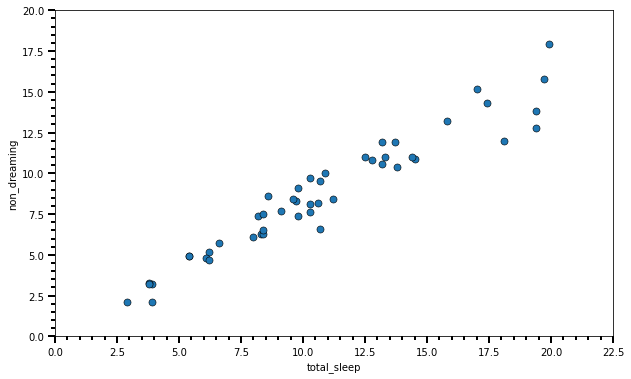

In [29]:
fig = plt.figure(figsize=(10,6))

g = sns.scatterplot(x="total_sleep", y="non_dreaming", data=df_mam, edgecolor="black", s=50)

g.set_xlabel("total_sleep")
g.set_ylabel("non_dreaming")

g.set_xlim(0, 22.5)
g.set_ylim(0, 20)

g.xaxis.set_minor_locator(AutoMinorLocator())
g.yaxis.set_minor_locator(AutoMinorLocator())

g.tick_params(which="both", width=2)
g.tick_params(which="major", length=7)
g.tick_params(which="minor", length=4)

In [12]:
import statsmodels.formula.api as smf

In [13]:
mod = smf.ols(formula="non_dreaming ~ total_sleep", data=df_mam)

In [14]:
res = mod.fit()

In [15]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           non_dreaming   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     582.6
Date:                Sat, 12 Feb 2022   Prob (F-statistic):           9.23e-28
Time:                        04:53:26   Log-Likelihood:                -67.211
No. Observations:                  48   AIC:                             138.4
Df Residuals:                      46   BIC:                             142.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4269      0.371      1.150      0.256      -0.320       1.174
total_sleep     0.7707      0.032     24.137      0.000       0.706       0.835
==============================================================================
Omnibus:                        2.727   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.256   Jarque-Bera (JB):                1.777
Skew:                          -0.424   Prob(JB):                        0.411
Kurtosis:                       3.413   Cond. No.                         30.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
import statsmodels.api as sm

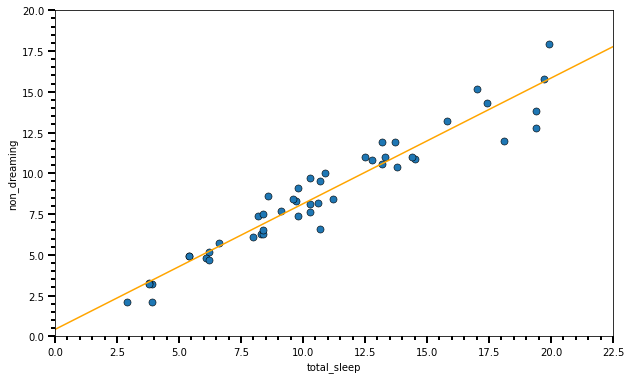

In [17]:
sm.graphics.abline_plot(model_results=res, ax=g, color="orange")

<AxesSubplot:xlabel='total_sleep', ylabel='resid'>

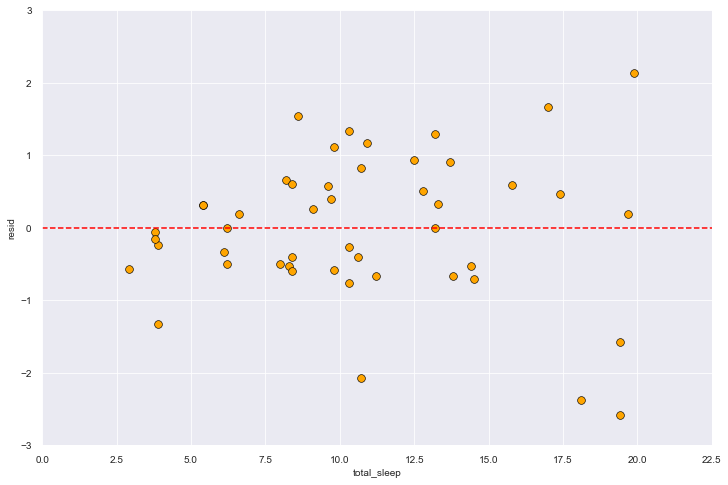

In [18]:
plt.figure(figsize=(12,8))

sns.set_style(style="darkgrid")

g = sns.scatterplot(x=df_mam["total_sleep"], y=res.resid, edgecolor="black", color="orange", s=60)

g.set_xlim(0, 22.5)
g.set_ylim(-3, 3)

g.set_ylabel("resid")

g.xaxis.set_minor_locator(AutoMinorLocator())
g.yaxis.set_minor_locator(AutoMinorLocator())

g.tick_params(which="both", width=2)
g.tick_params(which="major", length=7)
g.tick_params(which="minor", length=4)

sm.graphics.abline_plot(0, 0, ax=g, linestyle='--', color="red")

g

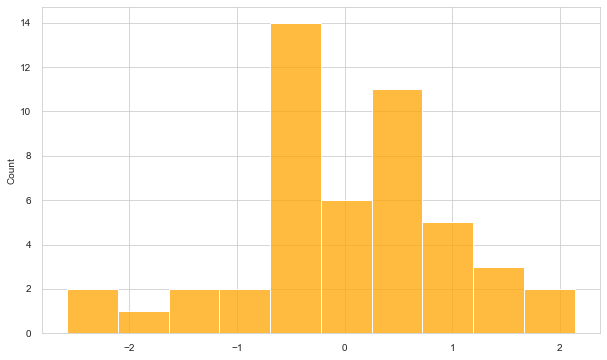

In [19]:
sns.set_style(style="whitegrid")

plt.figure(figsize=(10,6))

g = sns.histplot(res.resid, bins=10, color="orange")

g.xaxis.set_minor_locator(AutoMinorLocator())
g.yaxis.set_minor_locator(AutoMinorLocator())

g.tick_params(which="both", width=2)
g.tick_params(which="major", length=7)
g.tick_params(which="minor", length=4)

In [20]:
from scipy import stats

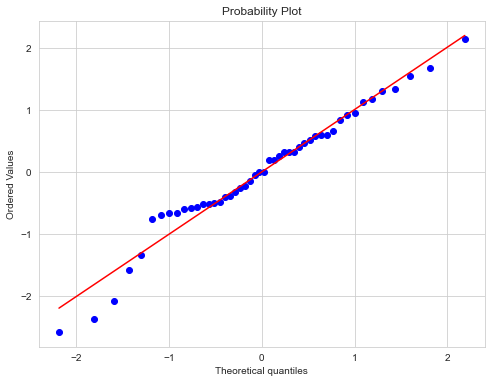

In [21]:
plt.figure(figsize=(8,6))

ax = stats.probplot(res.resid, dist="norm", plot=plt)

In [22]:
stats.shapiro(res.resid)

ShapiroResult(statistic=0.9705839157104492, pvalue=0.2668907046318054)

In [23]:
cognitive = pd.read_csv("cognitive.csv")

In [24]:
df_cog = cognitive.copy()

In [25]:
df_cog.isnull().any()

kid_score    False
mom_hs       False
mom_iq       False
mom_work     False
mom_age      False
dtype: bool

In [26]:
df_cog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   kid_score  434 non-null    int64  
 1   mom_hs     434 non-null    object 
 2   mom_iq     434 non-null    float64
 3   mom_work   434 non-null    object 
 4   mom_age    434 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 17.1+ KB


In [27]:
df_cog.head()

dfi.export(df_cog.head(), "df_cog_5.png")

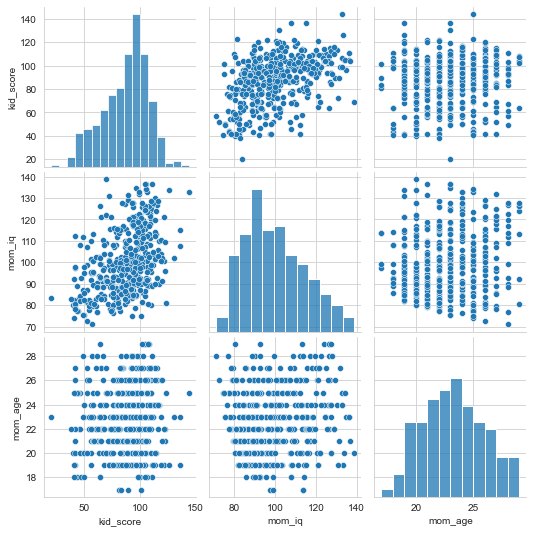

In [28]:
sns.pairplot(data=df_cog)

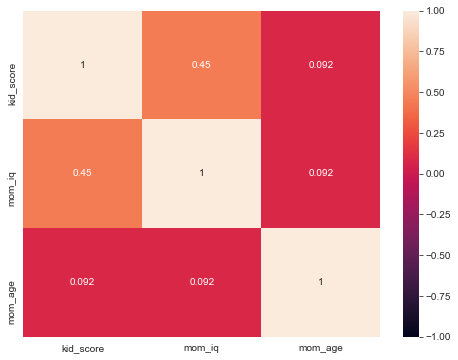

In [30]:
fig = plt.figure(figsize=(8,6))

g = sns.heatmap(df_cog.corr(), vmin=-1, vmax=1, annot=True)

fig.savefig("corr_heatmap_cog.png", dpi=300)

In [31]:
mod = smf.ols(formula="kid_score ~ mom_age + mom_work + mom_iq + mom_hs", data=df_cog)

In [32]:
res = mod.fit()

In [33]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     29.74
Date:                Fri, 04 Feb 2022   Prob (F-statistic):           7.51e-22
Time:                        20:03:14   Log-Likelihood:                -1871.2
No. Observations:                 434   AIC:                             3752.
Df Residuals:                     429   BIC:                             3773.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          19.5924      9.219      2.125      0.034       1.472      37.713
mom_work[T.yes]     2.5372      2.351      1.079      0.281      -2.083       7.157
mom_hs[T.yes]       5.0948      2.315      2.201      0.028       0.546       9.644
mom_age             0.2180      0.331      0.659      0.510      -0.432       0.868
mom_iq              0.5615      0.061      9.259      0.000       0.442       0.681
==============================================================================
Omnibus:                        7.381   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                7.590
Skew:                          -0.318   Prob(JB):                       0.0225
Kurtosis:                       2.872   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
mod = smf.ols(formula="kid_score ~ mom_work + mom_iq + mom_hs", data=df_cog)

In [34]:
res = mod.fit()

In [35]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     39.57
Date:                Fri, 04 Feb 2022   Prob (F-statistic):           1.35e-22
Time:                        17:10:39   Log-Likelihood:                -1871.4
No. Observations:                 434   AIC:                             3751.
Df Residuals:                     430   BIC:                             3767.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          24.1794      6.043      4.001      0.000      12.302      36.057
mom_work[T.yes]     2.5664      2.349      1.093      0.275      -2.050       7.183
mom_hs[T.yes]       5.3823      2.272      2.369      0.018       0.918       9.847
mom_iq              0.5628      0.061      9.291      0.000       0.444       0.682
==============================================================================
Omnibus:                        7.468   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                7.683
Skew:                          -0.319   Prob(JB):                       0.0215
Kurtosis:                       2.868   Cond. No.                         706.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
mod = smf.ols(formula="kid_score ~ mom_iq + mom_hs", data=df_cog)

In [37]:
res = mod.fit()

In [38]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     58.72
Date:                Fri, 04 Feb 2022   Prob (F-statistic):           2.79e-23
Time:                        17:10:39   Log-Likelihood:                -1872.0
No. Observations:                 434   AIC:                             3750.
Df Residuals:                     431   BIC:                             3762.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        25.7315      5.875      4.380      0.000      14.184      37.279
mom_hs[T.yes]     5.9501      2.212      2.690      0.007       1.603      10.297
mom_iq            0.5639      0.061      9.309      0.000       0.445       0.683
==============================================================================
Omnibus:                        7.327   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                7.530
Skew:                          -0.313   Prob(JB):                       0.0232
Kurtosis:                       2.845   Cond. No.                         683.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

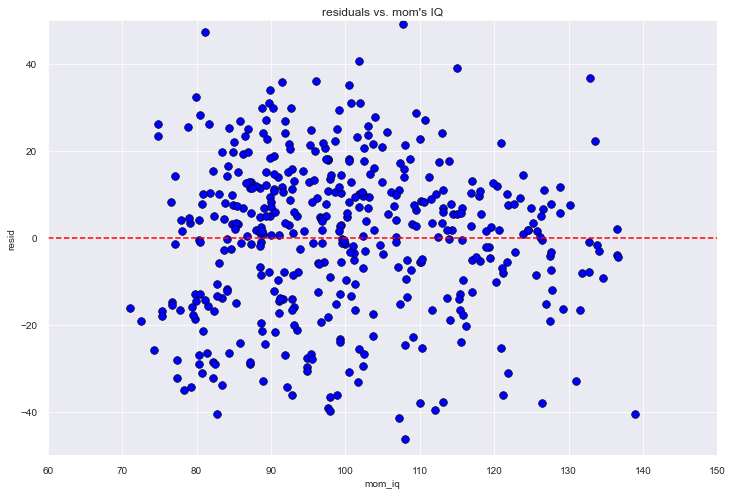

In [35]:
fig = plt.figure(figsize=(12,8))

sns.set_style(style="darkgrid")

g = sns.scatterplot(x=df_cog["mom_iq"], y=res.resid, edgecolor="black", color="blue", s=60)

g.set_ylabel("resid")
g.set_title("residuals vs. mom's IQ")

g.xaxis.set_minor_locator(AutoMinorLocator())
g.yaxis.set_minor_locator(AutoMinorLocator())

g.tick_params(which="both", width=2)
g.tick_params(which="major", length=7)
g.tick_params(which="minor", length=4)

sm.graphics.abline_plot(0, 0, ax=g, linestyle='--', color="red")

g.set_xlim(60, 150)
g.set_ylim(-50, 50)

fig.savefig("residual_plot_for_linearity.png", dpi=300)

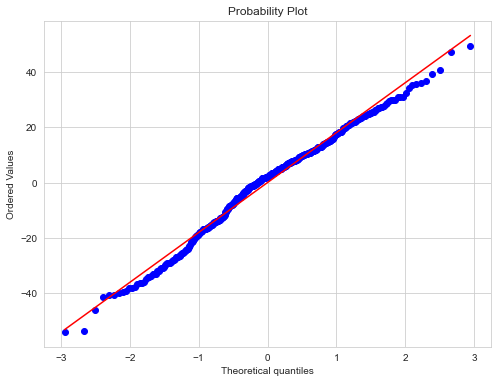

In [34]:
fig = plt.figure(figsize=(8,6))

ax = stats.probplot(res.resid, dist="norm", plot=plt)

fig.savefig("prob_plot.png", dpi=300)

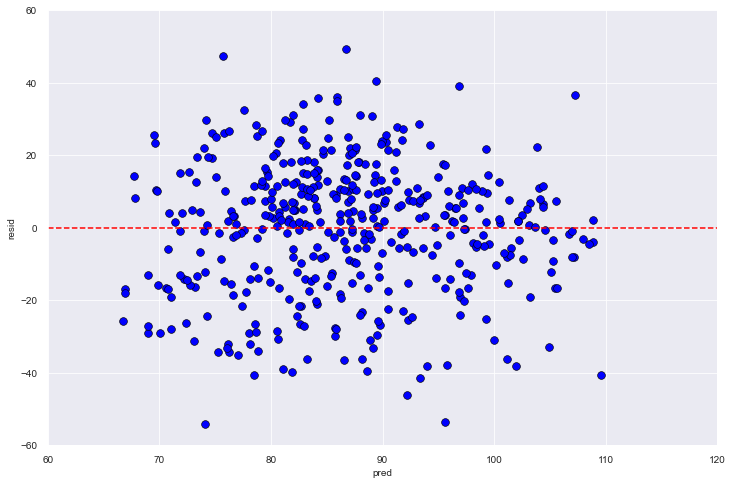

In [36]:
fig = plt.figure(figsize=(12,8))

sns.set_style(style="darkgrid")

g = sns.scatterplot(x=res.predict(), y=res.resid, edgecolor="black", color="blue", s=60)

g.set_ylabel("resid")
g.set_xlabel("pred")

g.xaxis.set_minor_locator(AutoMinorLocator())
g.yaxis.set_minor_locator(AutoMinorLocator())

g.tick_params(which="both", width=2)
g.tick_params(which="major", length=7)
g.tick_params(which="minor", length=4)

sm.graphics.abline_plot(0, 0, ax=g, linestyle='--', color="red")

g.set_xlim(60, 120)
g.set_ylim(-60, 60)

g

fig.savefig("fit_vs_resids.png", dpi=300)

<AxesSubplot:xlabel='pred', ylabel='resid'>

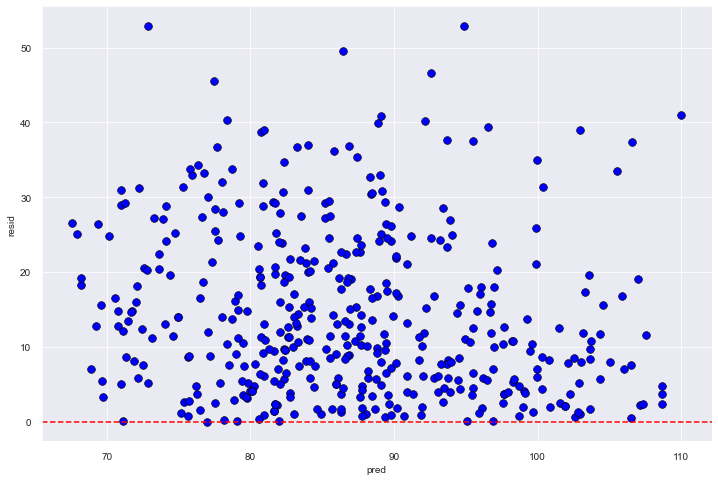

In [48]:
plt.figure(figsize=(12,8))

sns.set_style(style="darkgrid")

g = sns.scatterplot(x=res.predict(), y=abs(res.resid), edgecolor="black", color="blue", s=60)

g.set_ylabel("resid")
g.set_xlabel("pred")

g.xaxis.set_minor_locator(AutoMinorLocator())
g.yaxis.set_minor_locator(AutoMinorLocator())

g.tick_params(which="both", width=2)
g.tick_params(which="major", length=7)
g.tick_params(which="minor", length=4)

sm.graphics.abline_plot(0, 0, ax=g, linestyle='--', color="red")

# g.set_xlim(60, 120)
# g.set_ylim(-60, 60)

g